In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
train_data = pd.read_csv('titanic/train.csv')
test_data = pd.read_csv('titanic/test.csv')
submission = pd.read_csv('titanic/gender_submission.csv')

In [66]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [67]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


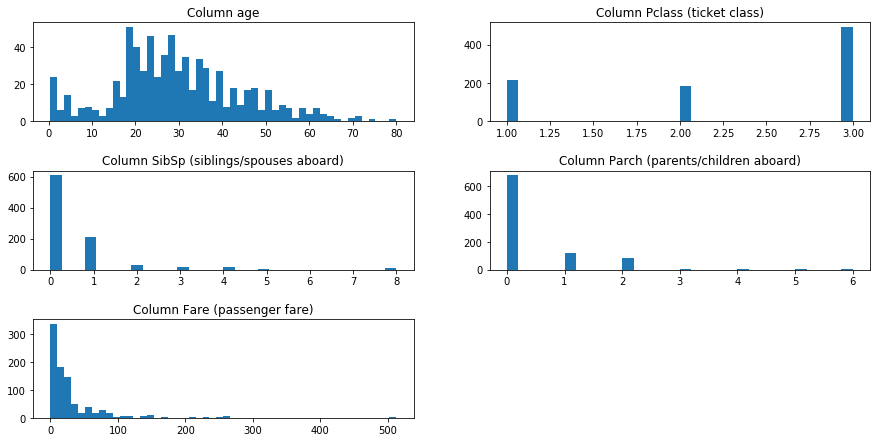

In [62]:
plt.figure(figsize=(15, 10))

plt.subplot(4, 2, 1)
plt.hist(x = train_data.Age, bins=50)
plt.title('Column age')

plt.subplot(4, 2, 2)
plt.hist(x = train_data.Pclass, bins = 30)
plt.title('Column Pclass (ticket class)')

plt.subplot(4, 2, 3)
plt.hist(x = train_data.SibSp, bins = 30)
plt.title('Column SibSp (siblings/spouses aboard)')

plt.subplot(4, 2, 4)
plt.hist(x = train_data.Parch, bins = 30)
plt.title('Column Parch (parents/children aboard)')

plt.subplot(4, 2, 5)
plt.hist(x = train_data.Fare, bins = 50)
plt.title('Column Fare (passenger fare)')

plt.subplots_adjust(hspace = 0.5)

plt.show()

In [64]:
train_data.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [34]:
train_data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [37]:
train_data.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

* If passenger fare influenced the survivement of passenger

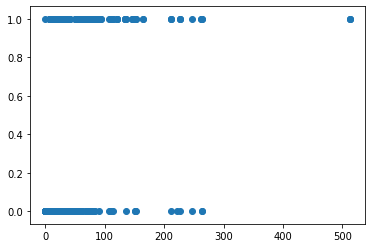

In [43]:
plt.scatter(train_data.Fare, train_data.Survived)
plt.show()

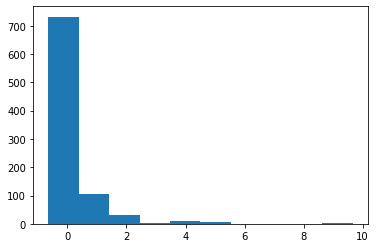

In [81]:
normalized_df=(train_data.Fare-train_data.Fare.mean())/train_data.Fare.std()

plt.hist(normalized_df)
plt.show()

In [90]:
from sklearn import preprocessing

names = ['Fare']
scaler = preprocessing.StandardScaler()

scaled_df = scaler.fit_transform(train_data[names])
train_data['Fare_to_norm'] = scaled_df

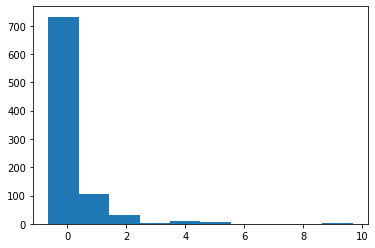

In [91]:
plt.hist(train_data['Fare_to_norm'])
plt.show()a

# Preprocessing notes

* Map **Sex** column to 1 and 0 (v)
* **Embarked** -1 to mean values (v)
* Map **Embarked** to 0, 1 and 2 (v)
* **Age** mean to NAN values (v)
* Normalize **Fare**
* **Cabin** to get dummies
* Normalize **age** ?

# Feature Engineering notes

* Explore Relatives by names/cabin/Pclass ---> New columns Same family <---- 
* Check couple with Gender and Sibsp and Pclass and name
* Get last name and relatives (split by comma (,))